# Model Selection for Linear Regression

### Process: 

#### Set-up: 
- training and test split, some standardization
- creating custom function to measure performance

#### Ordinary Least Squares simple performance test
- simple performance test with no features removed

#### LassoCV
- using LassoCV to capture best alpha
- L1 regularization, removing features with low coefficients

#### GridsearchCV
- hypertuning and capturing best alpha, trying other regularization methodologies 

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection

pd.set_option('display.max_columns', None)

#### Reading the feature engineered dataset

In [35]:
dummy = pd.read_csv('./data/clean/dummy.csv')

In [36]:
dummy.head()

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MiscVal,MoSold,YrSold,TotalSF,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,856.0,126000,30,81.47,7890.0,6,6,1939.0,1950.0,0.0,3,3,3,3,1,3,3,2,1,3,4,1,4,1939.0,2.0,399.0,3,3,0,3,2010,1712.0,166.0,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,1049.0,139500,120,42.00,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,3,2,1,4,5,0,0,1984.0,1.0,266.0,3,3,0,2,2009,2098.0,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1049.0,139500,120,42.00,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,3,2,1,4,5,0,0,1984.0,1.0,266.0,3,3,0,2,2009,2098.0,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1001.0,124900,30,60.00,6060.0,5,9,1930.0,2007.0,0.0,4,3,3,3,1,5,5,2,1,4,5,0,0,1930.0,1.0,216.0,3,1,0,11,2007,1838.0,282.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1039.0,114000,70,80.00,8146.0,4,8,1900.0,2003.0,0.0,4,4,2,3,1,1,4,2,1,3,6,0,0,1940.0,1.0,281.0,3,3,0,5,2009,1444.0,279.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [37]:
dummy.dtypes

GrLivArea            float64
SalePrice              int64
MSSubClass             int64
LotFrontage          float64
LotArea              float64
                      ...   
RoofStyle_Gable        int64
RoofStyle_Gambrel      int64
RoofStyle_Hip          int64
RoofStyle_Mansard      int64
RoofStyle_Shed         int64
Length: 122, dtype: object

# Ordinary Least Squares Regression

### (1) OLS without penalization or feature engineering: 
### (2) OLS without penalization:
### (3) OLS with L1 regularization (lasso) and feature engineering: 
- Splitting the data into training & testing, fitting, and standardization

### preparing the dummy data

In [38]:
#Setting the value for X and Y
X = dummy.drop(['SalePrice'], axis = 1)
y = dummy['SalePrice']

log_y = np.log(y)

In [39]:
X.head(5)

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MiscVal,MoSold,YrSold,TotalSF,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,856.0,30,81.47,7890.0,6,6,1939.0,1950.0,0.0,3,3,3,3,1,3,3,2,1,3,4,1,4,1939.0,2.0,399.0,3,3,0,3,2010,1712.0,166.0,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,1049.0,120,42.00,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,3,2,1,4,5,0,0,1984.0,1.0,266.0,3,3,0,2,2009,2098.0,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1049.0,120,42.00,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,3,2,1,4,5,0,0,1984.0,1.0,266.0,3,3,0,2,2009,2098.0,105.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1001.0,30,60.00,6060.0,5,9,1930.0,2007.0,0.0,4,3,3,3,1,5,5,2,1,4,5,0,0,1930.0,1.0,216.0,3,1,0,11,2007,1838.0,282.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1039.0,70,80.00,8146.0,4,8,1900.0,2003.0,0.0,4,4,2,3,1,1,4,2,1,3,6,0,0,1940.0,1.0,281.0,3,3,0,5,2009,1444.0,279.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [40]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, log_y, test_size = 0.2, random_state = 4)

In [41]:
scaler = MinMaxScaler()
standard = StandardScaler()

#fitting standardization and transforming
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
from sklearn.linear_model import LinearRegression

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(X_train, y_train)


LinearRegression()

#### MLR Model Equation

In [43]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))


Intercept:  13.210381150742261
Coefficients:


[('GrLivArea', 0.00016984370266767563),
 ('MSSubClass', -0.0005890739427001713),
 ('LotFrontage', 0.0003244179249667665),
 ('LotArea', 2.0585706003011526e-06),
 ('OverallQual', 0.05268663722345966),
 ('OverallCond', 0.04357382702091143),
 ('YearBuilt', 0.0020372004206425107),
 ('YearRemodAdd', 0.0004356834409562642),
 ('MasVnrArea', 6.735634404384959e-05),
 ('ExterQual', 0.006193729118213382),
 ('ExterCond', -0.006550297663753892),
 ('BsmtQual', 0.0068161829337153165),
 ('BsmtCond', -0.005438940128478598),
 ('BsmtExposure', 0.015747639582950383),
 ('BsmtFinType1', 0.012115220885693504),
 ('HeatingQC', 0.013196127512884685),
 ('BedroomAbvGr', -0.01162657152929069),
 ('KitchenAbvGr', -0.01717457472269228),
 ('KitchenQual', 0.018933097592116706),
 ('TotRmsAbvGrd', 0.0058814760035460455),
 ('Fireplaces', 0.014659458362181656),
 ('FireplaceQu', 0.0038531823876904285),
 ('GarageYrBlt', -4.5358024846425815e-05),
 ('GarageCars', 0.019165002180707533),
 ('GarageArea', 9.089374712560258e-05),
 (

#### Predicted and actual values

In [44]:
#Prediction of test set
y_test_predict = mlr.predict(X_test)

#Predicted values
print("Prediction for test set: {}".format(y_test_predict))


Prediction for test set: [11.97985078 11.68542069 12.39172309 12.04592529 11.91423821 12.23391611
 11.95915565 12.06701332 11.79866572 11.85705879 12.75314957 11.6296034
 12.25543409 12.38151725 12.01730456 11.46969001 11.73582237 11.5166317
 12.20009253 12.26871137 11.9171131  11.83156622 11.99351973 12.35131318
 11.77038539 12.12112055 12.17817942 11.74145    12.75018076 12.20909363
 12.12919239 12.52436407 11.97773822 12.71617097 11.4971327  12.32888653
 13.12282531 12.01165495 12.02276504 12.20451427 11.55294711 11.31178647
 12.17160215 11.99011746 11.45342965 12.5575607  13.12282531 11.76958214
 12.12188537 12.05460348 12.59236093 12.21233755 11.7524558  11.73987449
 11.740478   12.65979228 12.12077408 11.74021978 11.80538854 12.5660623
 12.19026671 12.16020076 11.27565375 11.29761902 12.18233312 11.93708119
 11.99976314 12.53101585 11.77908266 11.81549092 11.74119647 11.84374646
 11.73030562 11.87090297 11.79597963 12.09886738 12.04614978 11.85020526
 11.62796414 11.91575525 12.4

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_predict})
mlr_diff.head()

### Evaluating the Model

In [45]:
#fitting to training and evaluating on test dataset with R^2

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print(f'R2 score on training data: {round(mlr.score(X_train, y_train),3)}')
print(f'R2 score on test data: {round(mlr.score(X_test, y_test),3)}')


R2 score on training data: 0.938
R2 score on test data: 0.864


In [47]:
#Model evaluation with root mean squared error, calculate RMSE

y_test_predict = mlr.predict(X_test)

print(f'Root Mean Square Error of model on test data is: \
{np.round(mean_squared_error(y_test, y_test_predict)**0.5,3)}')

print(f'Root Mean Square Error of model on train data is: \
{np.round(mean_squared_error(y_train, mlr.predict(X_train))**0.5, 3)}')

Root Mean Square Error of model on test data is: 0.149
Root Mean Square Error of model on train data is: 0.096


In [48]:
# Define a function to plot predictions vs actuals

def plot_y_yhat(y, yhat):
    '''This function accepts 2 series and plots a scatter plot of y vs yhat.
    The function also plots an x=y line to demonstrate the 'perfect model', 
    where y = yhat'''

    plt.figure(figsize=(5,5))

    plt.scatter(y, yhat, color='mediumorchid', s=4, label='Predicted vs. Actual', alpha=0.7 )

    # Plot 'perfect model' (x=y) line on plot
    max_val = np.max(y)
    plt.plot([0, max_val*1.05], [0, max_val*1.05], color='navy',
            linewidth=2.0, alpha=0.5, label='Perfect model', )
    
    # Add grid to plot
    plt.grid(color='lightgrey', linewidth=0.7, linestyle='--')
    
    plt.xlabel('Actual Sale Price ($)')
    plt.xlim(0,max_val*1.05)

    plt.ylabel('Predicted Sale Price ($)')
    plt.ylim(0,max_val*1.05)
    
    plt.title('Plot of predicted values vs. actual values')
    plt.legend() 
    plt.show()
    

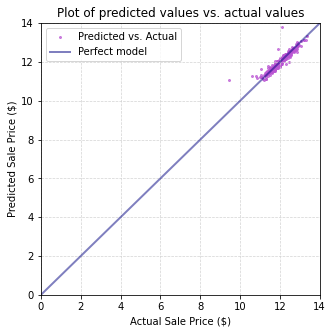

In [49]:
# Call function to plot model predictions vs actual test values
plot_y_yhat(y_test, mlr.predict(X_test))

In [104]:
# Display descriptive statistics for model predictions
pd.DataFrame(mlr.predict(X_test), columns=['Predicted Sales Price']).describe()

,Predicted Sales Price
count,525.000000
mean,12.008375
std,0.380187
min,11.041016
25%,11.755344
50%,11.957943
75%,12.251003
max,13.801676


In [50]:
# Display 10 largest model residuals, where prediction underestimated actual sale price 
df = pd.DataFrame({'Actual':y_test,'Prediction':mlr.predict(X_test)})
df['Residual'] = df['Actual'] - df['Prediction']
df.sort_values('Residual', inplace=True, ascending=False)
df.head(10)

,Actual,Prediction,Residual
2469,12.468437,11.985571,0.482866
1915,12.283034,11.898200,0.384834
78,12.880292,12.524364,0.355928
2037,13.071070,12.815298,0.255772
2021,11.982304,11.747235,0.235069
24,12.491173,12.269204,0.221969
1983,12.001505,11.783879,0.217626
301,12.100156,11.886111,0.214045
3,11.735269,11.531802,0.203467
1234,12.793859,12.598081,0.195779


In [106]:
# Display 10 largest negative residuals, where prediction overestimated actual sale price 
df.tail(10)

,Actual,Prediction,Residual
517,11.050890,11.317363,-0.266473
1435,11.775290,12.042803,-0.267514
511,11.407565,11.690197,-0.282632
2241,11.407565,11.751629,-0.344064
210,10.819778,11.304612,-0.484834
1558,11.041048,11.692503,-0.651455
750,10.596635,11.257934,-0.661299
280,11.918391,12.690213,-0.771822
434,9.456341,11.041016,-1.584675
315,12.126759,13.801676,-1.674917


In [107]:
# Display 10 largest negative residuals, where prediction overestimated actual sale price 
df.tail(10)

,Actual,Prediction,Residual
517,11.050890,11.317363,-0.266473
1435,11.775290,12.042803,-0.267514
511,11.407565,11.690197,-0.282632
2241,11.407565,11.751629,-0.344064
210,10.819778,11.304612,-0.484834
1558,11.041048,11.692503,-0.651455
750,10.596635,11.257934,-0.661299
280,11.918391,12.690213,-0.771822
434,9.456341,11.041016,-1.584675
315,12.126759,13.801676,-1.674917


# Cross validation and Regularization gridsearch
I'll now see if I can improve on the model performance with regularisation.

### GridSearch CV with Lasso

In [51]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=3000)

# define grid
grid = dict()
grid['alpha'] = np.logspace(-4,3,5000)

# Perform a lasso regularisation gridsearch
gs = GridSearchCV(lasso, grid, cv=5, return_train_score=True, refit=True)
gs.fit(X_train, y_train)
gs.best_params_

{'alpha': 0.00012613051356004406}

In [52]:
print(f'R2 score for optimal Lasso model on training data: {round(gs.score(X_train, y_train),3)}')
print(f'R2 score for optimal Lasso model on test data: {round(gs.score(X_test, y_test),3)}')

R2 score for optimal Lasso model on training data: 0.937
R2 score for optimal Lasso model on test data: 0.863


In [53]:
gs.best_estimator_.coef_

array([ 1.71132000e-04, -4.37193600e-04,  3.18496905e-04,  2.11519333e-06,
        5.62573979e-02,  4.44949068e-02,  2.17429670e-03,  4.63496043e-04,
        6.61319375e-05,  8.05005646e-03, -4.78437273e-03,  5.44711116e-03,
       -6.39826349e-03,  1.65661603e-02,  1.22930761e-02,  1.29403060e-02,
       -1.16731440e-02, -1.36484545e-02,  1.84999533e-02,  5.02371948e-03,
        1.34706327e-02,  4.88035378e-03, -5.10124295e-05,  1.85619290e-02,
        9.75158707e-05,  1.58340690e-02,  2.35857235e-02, -3.83376681e-06,
       -5.70862174e-04, -3.50352511e-03,  9.73107813e-05,  6.47181825e-05,
        1.92684312e-02, -1.44694643e-01,  4.24101816e-02, -0.00000000e+00,
        0.00000000e+00,  4.52979165e-02, -8.17066544e-03,  1.32022906e-02,
       -0.00000000e+00, -8.02323338e-04,  0.00000000e+00, -1.23434390e-02,
        3.26496210e-02,  3.80377649e-02, -1.31899440e-02,  1.09891770e-01,
       -2.69207131e-02, -8.99882933e-03,  3.15955778e-02,  4.18511079e-01,
       -2.25373122e-04,  

In [54]:
# Perform a lasso regularisation gridsearch
from sklearn.linear_model import RidgeCV, LassoCV
lasso = LassoCV(alphas=np.logspace(-4,3,500), cv=5, max_iter=1000)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.03282813e-04, 1.06673394e-04, 1.10175281e-04,
       1.13792129e-04, 1.17527712e-04, 1.21385926e-04, 1.25370799e-04,
       1.29486487e-04, 1.33737286e-04, 1.38127630e-04, 1.42662102e-04,
       1.47345431e-04, 1.52182505e-04, 1.57178372e-04, 1.62338243e-04,
       1.67667503e-04, 1.73171713e-04, 1.78856616e-04, 1.84728144e-04,
       1.90792422e-04, 1.97055780e-0...
       4.75723614e+02, 4.91340729e+02, 5.07470524e+02, 5.24129830e+02,
       5.41336030e+02, 5.59107078e+02, 5.77461515e+02, 5.96418495e+02,
       6.15997796e+02, 6.36219849e+02, 6.57105755e+02, 6.78677305e+02,
       7.00957009e+02, 7.23968114e+02, 7.47734631e+02, 7.72281357e+02,
       7.97633907e+02, 8.23818733e+02, 8.50863158e+02, 8.78795401e+02,
       9.07644607e+02, 9.37440879e+02, 9.68215306e+02, 1.00000000e+03]),
        cv=5)

In [55]:
# Define dataframe with predictor coefficients for optimal lasso model
coef_0 = gs.best_estimator_.coef_
gs_coeffs = pd.DataFrame({'Feature': X.columns,
                             'Coef': coef_0,
                             'Abs_Coef': np.abs(coef_0)})
gs_coeffs.sort_values('Abs_Coef', inplace=True, ascending=False)

In [56]:
# Display 10 most important/largest coefficients
gs_coeffs.head(10)

,Feature,Coef,Abs_Coef
51,Neighborhood_GrnHill,0.418511,0.418511
33,MSZoning_C (all),-0.144695,0.144695
47,Neighborhood_Crawfor,0.109892,0.109892
66,Neighborhood_StoneBr,0.103500,0.103500
54,Neighborhood_MeadowV,-0.085038,0.085038
84,Exterior1st_BrkFace,0.082507,0.082507
70,BldgType_Duplex,-0.059554,0.059554
4,OverallQual,0.056257,0.056257
71,BldgType_Twnhs,-0.051053,0.051053
37,MSZoning_RL,0.045298,0.045298


In [57]:
# Display 10 least important/smallest coefficients
gs_coeffs.tail(38)

,Feature,Coef,Abs_Coef
7,YearRemodAdd,0.000463,0.000463
1,MSSubClass,-0.000437,0.000437
2,LotFrontage,0.000318,0.000318
52,Neighborhood_IDOTRR,-0.000225,0.000225
0,GrLivArea,0.000171,0.000171
24,GarageArea,0.000098,0.000098
30,TotalSF,0.000097,0.000097
8,MasVnrArea,0.000066,0.000066
31,TotalPorchSF,0.000065,0.000065
22,GarageYrBlt,-0.000051,0.000051


In [58]:
lasso_features = gs_coeffs.query('Coef!=0')['Feature'].to_list()
lasso_features

['Neighborhood_GrnHill',
 'MSZoning_C (all)',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr',
 'Neighborhood_MeadowV',
 'Exterior1st_BrkFace',
 'BldgType_Duplex',
 'OverallQual',
 'BldgType_Twnhs',
 'MSZoning_RL',
 'OverallCond',
 'MSZoning_FV',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Neighborhood_ClearCr',
 'Neighborhood_NWAmes',
 'Neighborhood_BrkSide',
 'Neighborhood_Greens',
 'Neighborhood_SawyerW',
 'PavedDrive_Y',
 'HouseStyle_SFoyer',
 'Neighborhood_Edwards',
 'Exterior1st_BrkComm',
 'GarageCond',
 'Foundation_Wood',
 'Electrical_FuseF',
 'TotalBR',
 'BldgType_2fmCon',
 'GarageType_Attchd',
 'GarageCars',
 'KitchenQual',
 'Foundation_PConc',
 'Exterior1st_MetalSd',
 'HouseStyle_2.5Fin',
 'BsmtExposure',
 'GarageQual',
 'Exterior1st_CemntBd',
 'MasVnrType_Stone',
 'Electrical_SBrkr',
 'KitchenAbvGr',
 'Fireplaces',
 'LotShape_IR2',
 'Neighborhood_CollgCr',
 'HeatingQC',
 'HouseStyle_2.5Unf',
 'Neighborhood_SWISU',
 'GarageType_Basment',
 'Neighborhood_BrDale',
 'Ext

In [59]:
print(f'Percent of predictor coefficients zeroed out by Lasso regularization: \
{round((np.sum(coef_0 == 0)/float(X.shape[1])) * 100,2)}%.')

Percent of predictor coefficients zeroed out by Lasso regularization: 21.49%.


In [60]:
print(f'# of predictor coefficients zeroed out by Lasso regularization: \
{(np.sum(coef_0 == 0))}')

print(f'# of total predictors: \
{(int(X.shape[1]))}')

# of predictor coefficients zeroed out by Lasso regularization: 26
# of total predictors: 121


TypeError: 'float' object cannot be interpreted as an integer

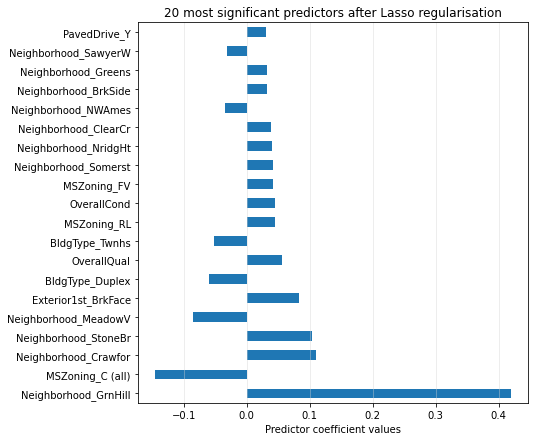

In [61]:
# Plot 20 largest coefficients
fig, ax = plt.subplots(figsize=(7,7))
title = '20 most significant predictors after Lasso regularisation'
gs_coeffs.Coef[:20].plot(kind='barh', ax=ax)
ax.set_yticklabels(gs_coeffs.Feature[:20].values)
ax.set_xlabel('Predictor coefficient values')
ax.set_title(title)

# Add a vertical grid to the plot
ax.xaxis.grid(True, linestyle='-', which='both', color='lightgrey', alpha=0.5)
ax.set_xticks(range(-1, 1, .01), minor=True)

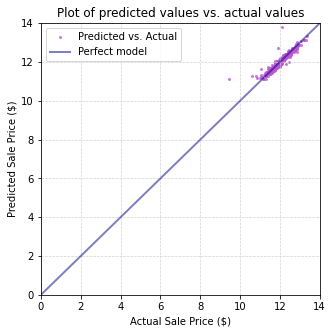

In [62]:
# Plot predictions for test data from optimum lasso model vs actual sale prices
y_test_predict = gs.predict(X_test)
plot_y_yhat(y_test, y_test_predict)

### Permutations 

In [63]:
from sklearn.inspection import permutation_importance

In [64]:
all_features = X_train.columns.values
all_features

array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF',
       'TotalPorchSF', 'TotalBR', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_I (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
  

(90.0, 126.44)

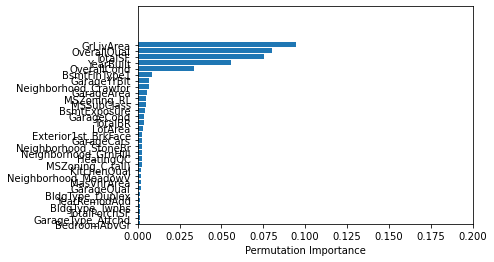

In [65]:
perm_importance = permutation_importance(gs, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(all_features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.xlim([0, .20])
plt.ylim(bottom=90)

### Lasso Visualization

In [70]:
alphas = np.logspace(-4, 4, 10) #np.linspace(1e-4,1, 500) 

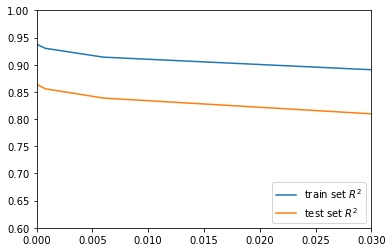

In [71]:
lasso = Lasso(max_iter = 10000)
coefs = []
r2_train =[]
r2_test =[]
norm = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
    r2_train.append(lasso.score(X_train, y_train))
    r2_test.append(lasso.score(X_test, y_test))
    ##add some MSE
    
#print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
#print(r2_score(y_train, pred_train_lasso))
 
plt.plot(alphas, r2_train, label=r'train set $R^2$')
plt.plot(alphas, r2_test, label=r'test set $R^2$')

plt.xlim([0, .03])
plt.ylim([.6, 1])
plt.legend(loc=4)


(-0.5, 2.5)

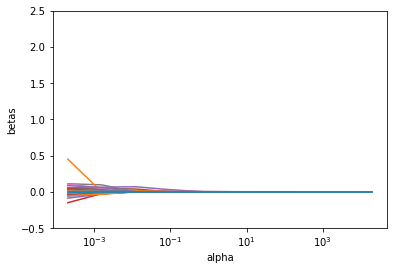

In [72]:
#coefficients vs alphas
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('betas')
plt.ylim([-.5, 2.5])

In [73]:
reg = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000, tol=0.0001)


In [74]:
reg.fit(X_train, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 93.68139083573442
Lasso Regression: R^2 score on test set 86.31504289493152


In [75]:
X.describe()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MiscVal,MoSold,YrSold,TotalSF,TotalPorchSF,TotalBR,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,1482.796494,57.869665,68.227024,10089.203125,6.040015,5.617378,1970.320122,1983.696265,98.773628,3.370427,3.092607,3.450076,2.924543,1.602515,3.601372,4.133003,2.846799,1.039634,3.479040,6.380335,0.599085,1.749238,1878.266768,1.744665,465.891387,2.814787,2.823933,48.066692,6.149009,2007.839558,2514.055259,183.573933,2.211319,0.006860,0.043445,0.000762,0.008003,0.776296,0.164253,0.027439,0.004954,0.638338,0.003811,0.011433,0.039634,0.015244,0.091463,0.035823,0.064405,0.055259,0.003049,0.000762,0.030488,0.000381,0.014482,0.040015,0.158918,0.008765,0.047256,0.025534,0.046875,0.082

### Creating some functions:

In [68]:
#import packages 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV

In [69]:
# Function for scoring training set
def train_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (train set)
    y: Dependant variable (train set)
    '''
    model.fit(X, y)
    #cv_scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation

    print('Training Score:', np.round(model.score(X, y), 4))
    #print('Cross-validation scores:', np.round(cv_scores, 4))
    #print('Mean cross-validation score:', np.round(cv_scores.mean(), 4))

In [ ]:
# Function for scoring test set
def test_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    model.fit(X, y)
    print('Test Score:', np.round(model.score(X, y), 4))

In [ ]:
# Function for MSE & RMSE scoring
def accuracy_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    yhat = model.predict(X)
    print('Mean Squared Error:', np.round(metrics.mean_squared_error(y, yhat), 4)) 
    print('Root Mean Squared Error:', np.round((metrics.mean_squared_error(y, yhat))**0.5, 4)) 